In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2018') is None:
    pui2018 = os.environ["PUI2018"] = "%s/PUI2018"%os.getenv("HOME")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import os
import json
#s = json.load( open(os.getenv('PUI2018') + "/wyw_matplotlibrc.json") )
#pl.rcParams.update(s)




Populating the interactive namespace from numpy and matplotlib


In [2]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.
### you do not have to have a code cell this complicated. 
### As long as 
### 1) your research is reproducible: we can access the same file as you without having to ask you for the file
### 2) and your data is stored in a directory pointed to by the env variable PUIDATA 
### you will be fine. We already explored how to download data in other notebooks!

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201704'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 

In [5]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [6]:
age_splitor = 2017 - 30

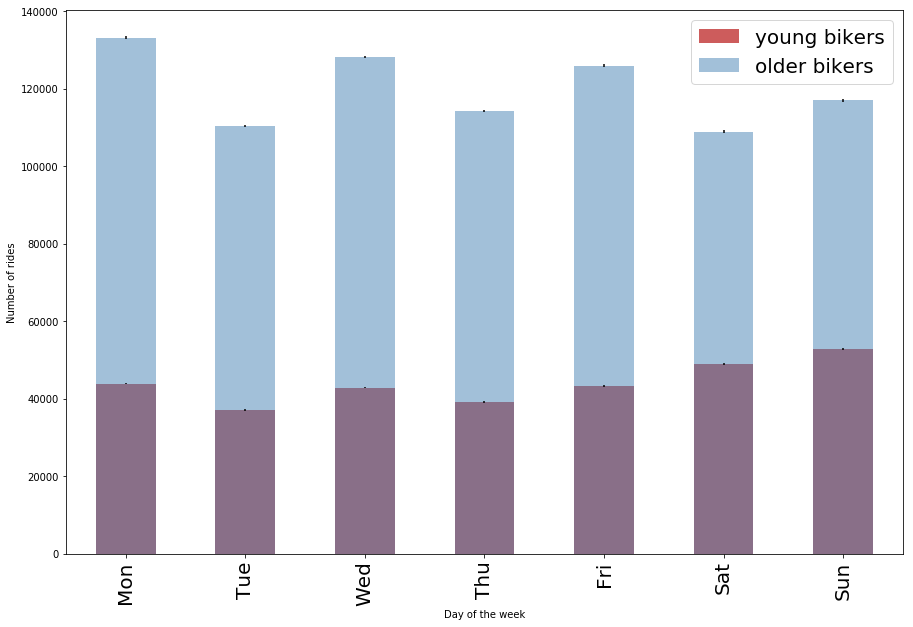

In [7]:
fig=pl.figure(figsize(15,10))

counts_y = (df['date'][df['birth year'] > age_splitor]).groupby([df.date.dt.weekday]).count()
norm_y = 1
error_y = np.sqrt(counts_y)
ax=((counts_y) / norm_y).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_y) / norm_y, (error_y) / norm_y)], label='young bikers')


counts_o = (df['date'][df['birth year'] <= age_splitor]).groupby([df.date.dt.weekday]).count()
norm_o = 1
error_o=np.sqrt(counts_o)
((counts_o) / norm_o).plot(kind="bar", alpha=0.5, yerr=[((error_o) / norm_o, (error_o) / norm_o)], 
                           color='SteelBlue', label='older bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['young bikers','older bikers'],fontsize=20)

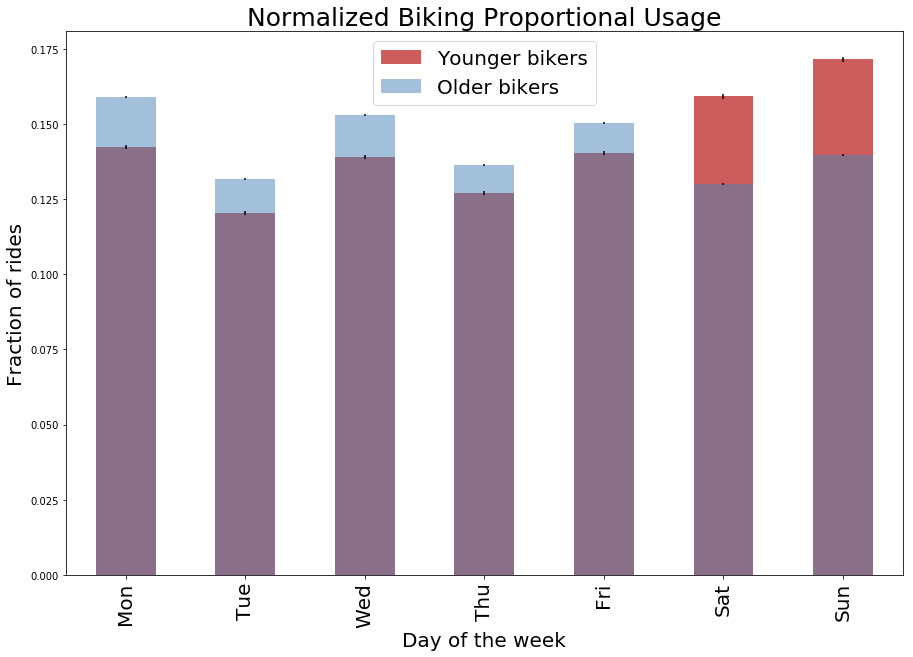

In [11]:
fig = pl.figure(figsize(15,10))

norm_y = counts_y.sum()
error_y = np.sqrt(counts_y)
((counts_y) / norm_y).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_y) / norm_y, (error_y) / norm_y)], 
                           label='young bikers')

norm_o = counts_o.sum()
ax = ((counts_o) / norm_o).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_o) / norm_o, (error_o) / norm_o)], 
                                color='SteelBlue', label='older bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides", fontsize=20)
ax.set_xlabel ("Day of the week", fontsize=20)
ax.set_title('Normalized Biking Proportional Usage', fontsize=25)

pl.legend(['Younger bikers','Older bikers'],fontsize=20)


